In [1]:
%pylab notebook
import numpy as np
import scipy as sp
from scipy.linalg import circulant

Populating the interactive namespace from numpy and matplotlib


[-0.89987484 -0.86884468 -0.83781451 -0.80678434 -0.77575418 -0.74472401
 -0.71369384 -0.68266367 -0.65163351 -0.62060334 -0.58957317 -0.55854301
 -0.52751284 -0.49648267 -0.46545251 -0.43442234 -0.40339217 -0.372362
 -0.34133184 -0.31030167 -0.2792715  -0.24824134 -0.21721117 -0.186181
 -0.15515084 -0.12412067 -0.0930905  -0.06206033 -0.03103017]
[-0.86884468 -0.83781451 -0.80678434 -0.77575418 -0.74472401 -0.71369384
 -0.68266367 -0.65163351 -0.62060334 -0.58957317 -0.55854301 -0.52751284
 -0.49648267 -0.46545251 -0.43442234 -0.40339217 -0.372362   -0.34133184
 -0.31030167 -0.2792715  -0.24824134 -0.21721117 -0.186181   -0.15515084
 -0.12412067 -0.0930905  -0.06206033 -0.03103017  0.        ]
0 1
1 0
2 1
3 0
4 1
5 0
6 1
7 0
8 1
9 0
10 1
11 0
12 1
13 0
14 1
15 0
16 1
17 0
18 1
19 0
20 1
21 0
22 1
23 0
24 1
25 0
26 1
27 0
28 1


<IPython.core.display.Javascript object>


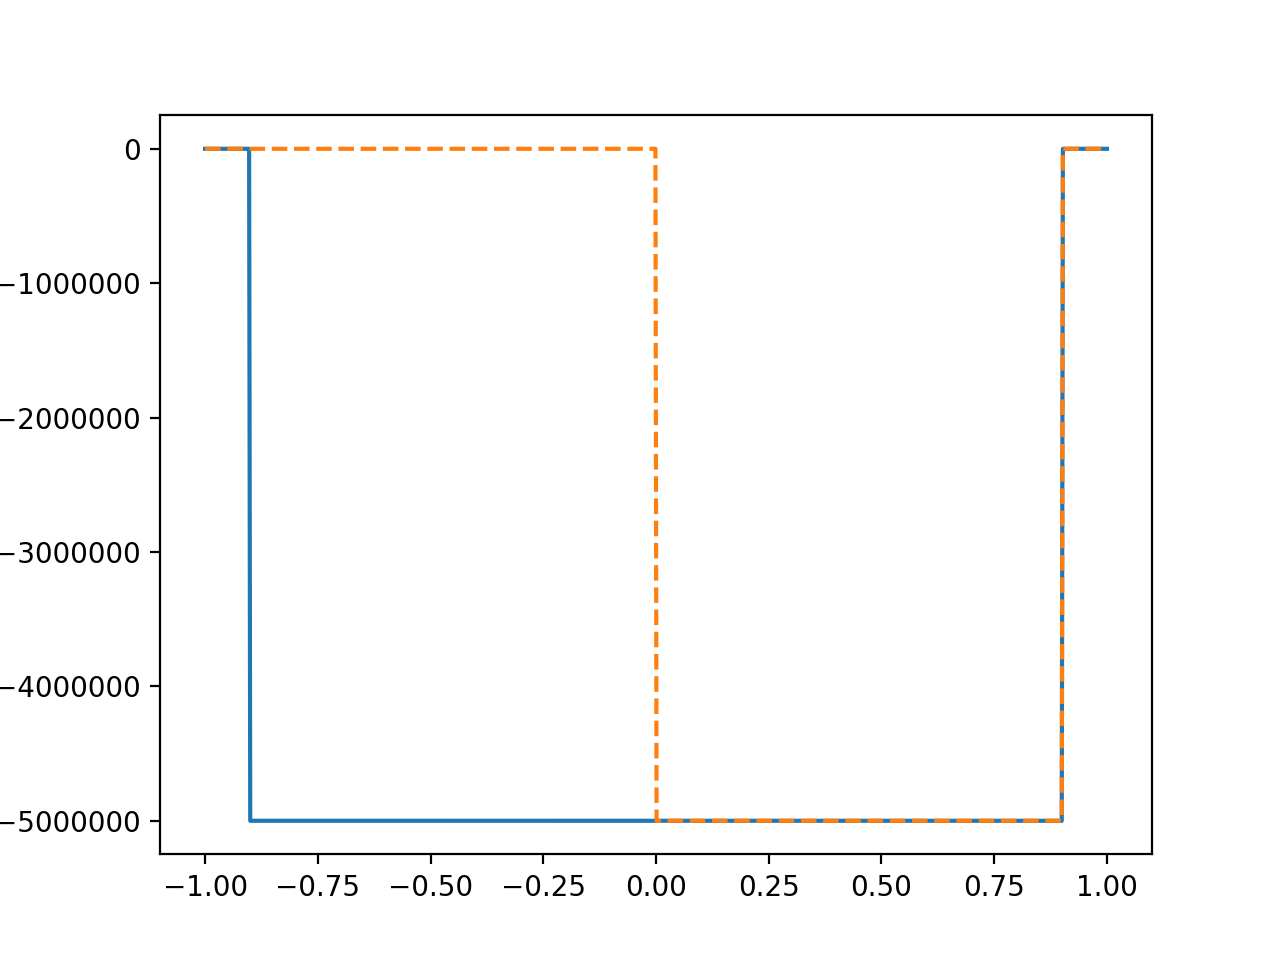

In [38]:
N=800 ;p=0.05; V0=5.e6
x=np.linspace(-1,1,N)
h=np.mean(x[1:]-x[:-1])
v=np.zeros(np.size(x),float)
v1=np.zeros(np.size(x),float)

# Step potential
#v[x<x[int(ceil(p*N))]]=1.; v[x>=x[N-int(ceil(p*N))]]=1.
# Harmonic well
#v=x**2. ; 
# V well
#sl=30
#v[x<0.]=-sl*(x[x<0.]) ; v[x>=0.]=max(v)# sl*(x[x>=0.5]-0.5)
# Dirac comb
v[x<x[int(ceil(p*N))]]=1.; v[x>=x[N-int(ceil(p*N))]]=1.
v1[x<=0]=1.; v1[x>=x[N-int(ceil(p*N))]]=1.

nbins=30
tx=linspace(x[int(ceil(p*N))],0,nbins)
xl=tx[:-1] 
print xl
xh=tx[1:]
print xh

for i in range(nbins-1):
    print i,1-mod(i,2)
    v[(x>=xl[i]) & (x<xh[i])]=0.00005*(1-mod(i,2))
#
v=V0*v/max(v)-V0
v1=V0*v1/max(v1)-V0

figure()
plot(x,v)
plot(x,v1,"--")

In [39]:
sO=np.zeros(np.size(x),float)
sO[0]=-2 ; sO[1]=1 ;  sO[N-1]=1
O=circulant(sO)/h/h
Ov=diag(v)
Ov1=diag(v1)

In [40]:
for i,tx1 in enumerate(x):
    for j,tx2 in enumerate(x):
        if tx1==tx2:
            O[i,j]=-2./h/h
        if abs(abs(tx1-tx2)/h-1.)<1.e-10:
            O[i,j]=1./h/h

<IPython.core.display.Javascript object>


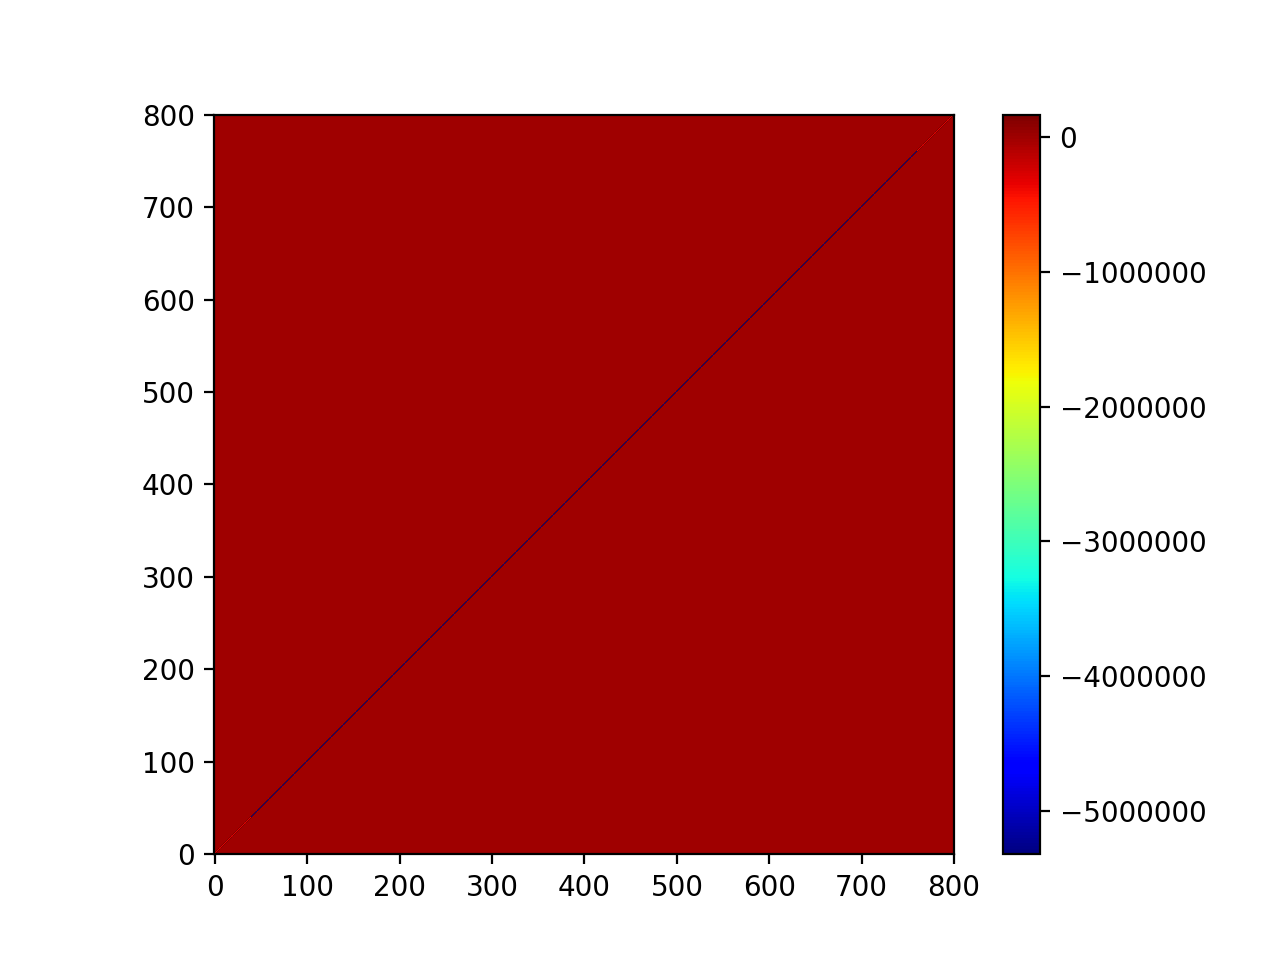

In [41]:
figure()
imshow(O+Ov,origin="lower")
colorbar()

In [42]:
E,z=np.linalg.eigh(-O+Ov)
E1,z1=np.linalg.eigh(-O+Ov1)

<IPython.core.display.Javascript object>


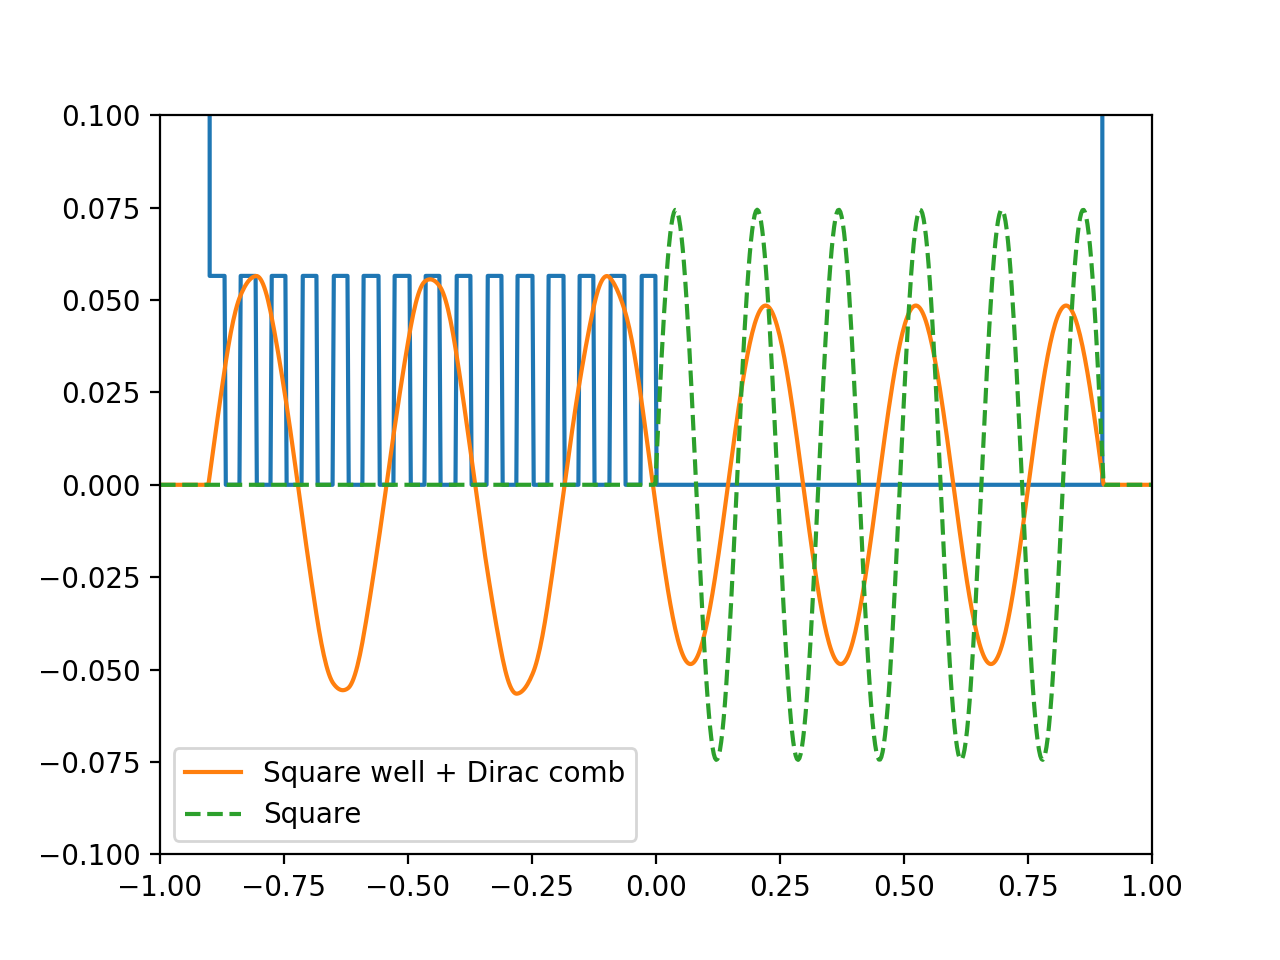

In [51]:
# figure()
# plot(x,z[:,0])
# plot(x,v/10/max(v))

# figure()
# for i in range(20):
#     plot(x,z[:,i])
    
figure()
i=10
plot(x,(v/max(abs(v[x<0]))+1.)*2*10000*max(abs(z[:,i])))
plot(x,z[:,i],label="Square well + Dirac comb")
plot(x,z1[:,i],"--",label="Square")
#xlim(-0.1,.5)
xlim(-1.,1.)
ylim(-0.1,0.1)
legend()

<IPython.core.display.Javascript object>


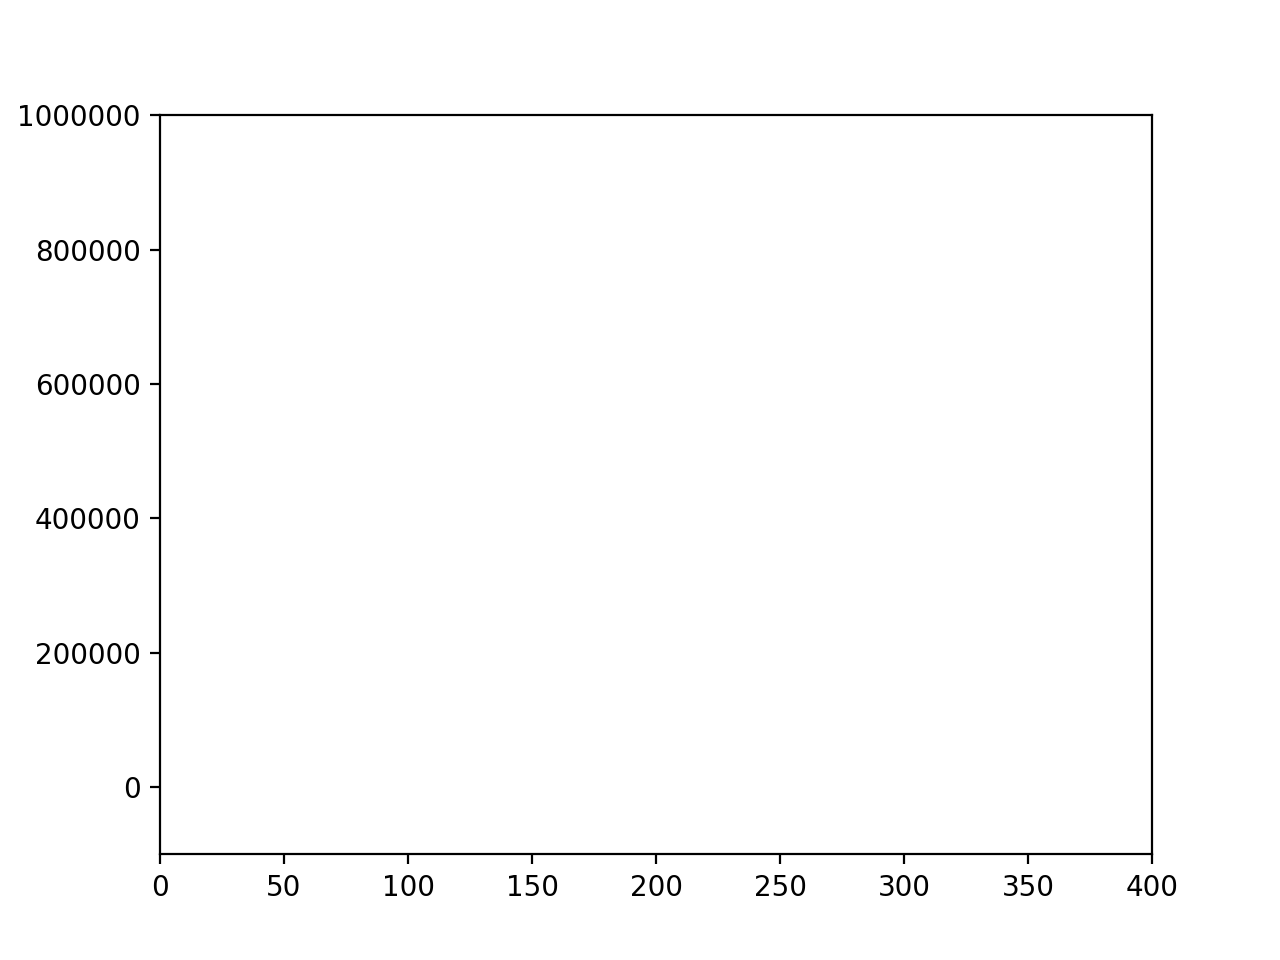

(-100000.0, 1000000.0)

In [116]:
figure()
plot(E)
xlim(0,400)
ylim(-1e5,1e6)